# Image Processing Programming Assignment 1


### Import dependencies


In [9]:
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

---

## Question 1

Image resizing is a widely used operation in image processing. Either for scaling up or for scaling down, we use interpolation to find the corresponding pixel intensity in the resulting image. Choice of interpolation method is important as it directly affects the quality of the resulting image. The following interpolation methods were mentioned in class:

- Nearest neighbor
- Bilinear
- Bicubic

If you look at PILLOWS reference page you can see that the `resize()` has predefined resampling functions:

- PIL.Image.NEAREST
- PIL.Image.BILINEAR
- PIL.Image.BICUBIC
- PIL.Image.LANCZOS

LANCZOS is a more sophisticated method which gives better results compared to first three methods. If you're interested search the internet for more details on LANCZOS Resampling Method. For this question,you will implement a jupyter notebook script and it will perform these operations:

1. Read colour version of the image `lena.png` and convert colored lena image to greyscale image.
2. Resize (scale down) the greyscale lena image to half its original size. Then, resize (scale up) it up back to the original size using `resize()` with `PIL.Image.NEAREST`
3. Resize (scale down) the greyscale lena image to half its original size. Then, resize (scale up) it up back to the original size using `resize()` with `PIL.Image.BILINEAR`
4. Resize (scale down) the greyscale lena image to half its original size. Then, resize (scale up) it up back to the original size using `resize()` with `PIL.Image.BICUBIC`
5. Your script should display the results as follows using matplotlib along with the PSNR values w.r.t original image below the result image.


### Part 1

Read colour version of the image `lena.png` and convert colored lena image to greyscale image.


Now, reading the `lena.png` image into the notebook.


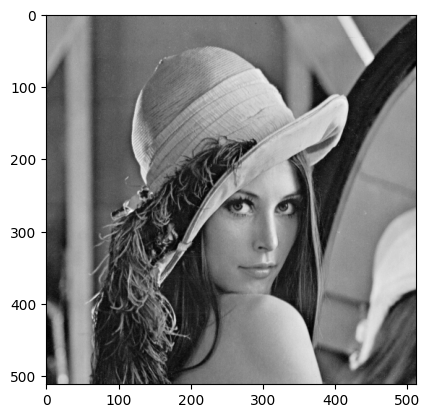

In [10]:
lena = Image.open("./assets/lena.bmp")

plt.imshow(lena, cmap='gray')


Converting the image to 3 dimensions.


In [11]:
lena.size


(512, 512)

### Part 2

Resize (scale down) the greyscale lena image to half its original size. Then, resize (scale up) it up back to the original size using `resize()` with `PIL.Image.NEAREST`.


Getting the dimensions of the image read.


In [12]:
lena.size


(512, 512)

Resizing the image.


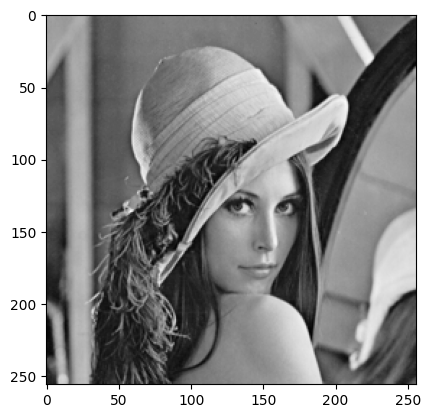

In [13]:
lena_half = lena.resize((256, 256))

plt.imshow(lena_half, cmap="gray")


Resizing it back to the original using `PIL.Image.NEAREST`.


C:\Users\deshi\AppData\Local\Temp\ipykernel_20112\406110500.py:1: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  lena_nearest = lena_half.resize((512, 512), PIL.Image.NEAREST)


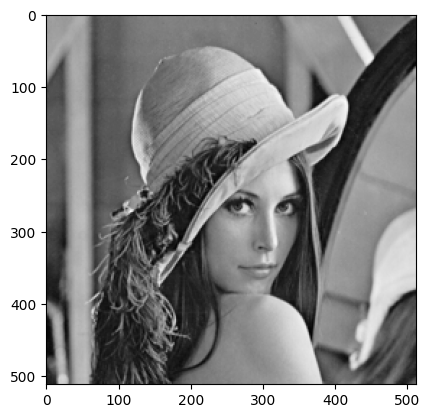

In [14]:
lena_nearest = lena_half.resize((512, 512), PIL.Image.NEAREST)

plt.imshow(lena_nearest, cmap="gray")


### Part 3

Resize (scale down) the greyscale lena image to half its original size. Then, resize (scale up) it up back to the original size using `resize()` with `PIL.Image.BILINEAR`.


C:\Users\deshi\AppData\Local\Temp\ipykernel_20112\2582413475.py:1: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  lena_bilinear = lena_half.resize((512, 512), PIL.Image.BILINEAR)


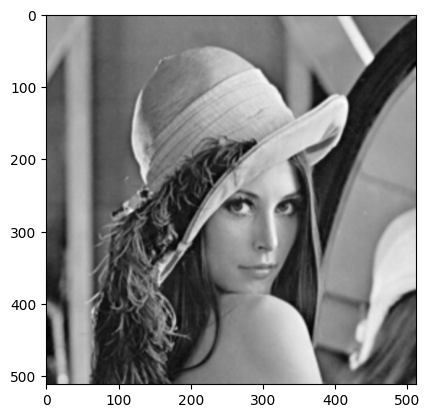

In [15]:
lena_bilinear = lena_half.resize((512, 512), PIL.Image.BILINEAR)
plt.imshow(lena_bilinear, cmap="gray")


### Part 4

Resize (scale down) the greyscale lena image to half its original size. Then, resize (scale up) it up back to the original size using `resize()` with `PIL.Image.BICUBIC`.


C:\Users\deshi\AppData\Local\Temp\ipykernel_20112\2722628894.py:1: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  lena_bicubic = lena_half.resize((512, 512), PIL.Image.BICUBIC)


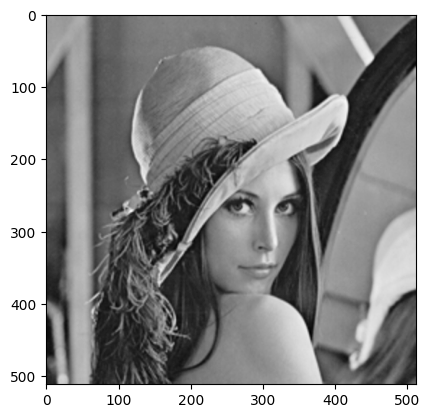

In [16]:
lena_bicubic = lena_half.resize((512, 512), PIL.Image.BICUBIC)
plt.imshow(lena_bicubic, cmap="gray")


### Part 5

Your script should display the results as follows using matplotlib along with the PSNR values w.r.t original image below the result image.


Function to calculate and return the PSNR value between two images.


In [17]:
def PSNR(im1, im2):
    R2 = np.amax(im1) ** 2

    MSE = np.sum(np.power(np.subtract(im1, im2), 2))
    MSE /= im1.size[0] * im1.size[1]

    PSNR = 10 * np.log10(R2 / MSE)

    return PSNR


Displaying the results.


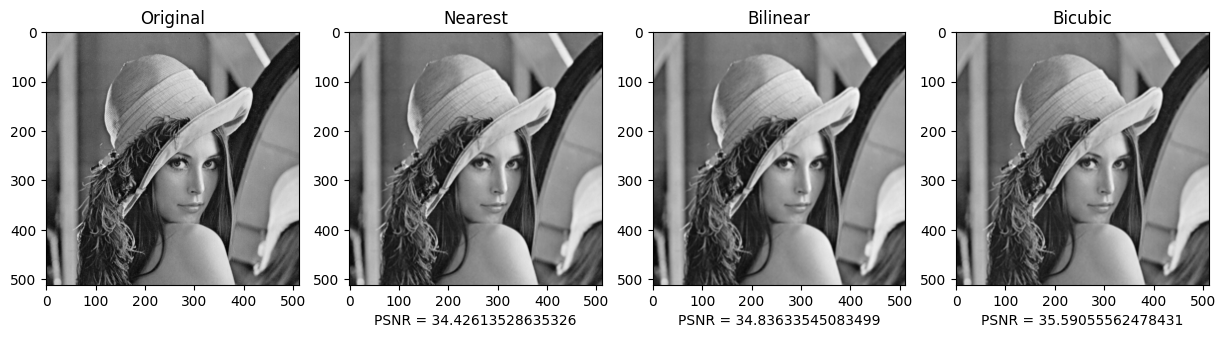

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(15, 10))

ax[0].imshow(lena, cmap="gray")
ax[0].set_title("Original")

ax[1].imshow(lena_nearest, cmap="gray")
ax[1].set_title("Nearest")

ax[1].set_xlabel("PSNR = " + str(PSNR(lena, lena_nearest)))
ax[2].imshow(lena_bilinear, cmap="gray")

ax[2].set_title("Bilinear")
ax[2].set_xlabel("PSNR = " + str(PSNR(lena, lena_bilinear)))
ax[3].imshow(lena_bicubic, cmap="gray")

ax[3].set_title("Bicubic")
ax[3].set_xlabel("PSNR = " + str(PSNR(lena, lena_bicubic)))

plt.show()


---


### Question 2

1. Define a generic function `(ChSwap)` that takes a color image as input and returns the corresponding output image in which the R, G, B channels are swapped as follows:
   1. Splits the input image into R, G, B Channels
   2. Red (Out) = Blue (In)
   3. Green (Out) = Red (In)
   4. Blue (Out) = Green (In)
   5. Combine the new channels to create the new image and return
2. Read color version of the image `lena.png`.
3. Use function `ChSwap` to create a color band swapped version of lena
4. Using matplotlib plot, display the original and new images side-by-side.


Defining a function `ChSwap()` to manipulate the image.

In [19]:
def ChSwap(im):
    im = np.array(im)
    im = im[:, :, ::-1]
    
    return Image.fromarray(im)


Loading the `kidred.jpg` image into the notebook.

In [20]:
red_eye_kid = Image.open("./assets/kidred.jpg")


Applying the swapping function and displaying the original and modified images side-by-side.

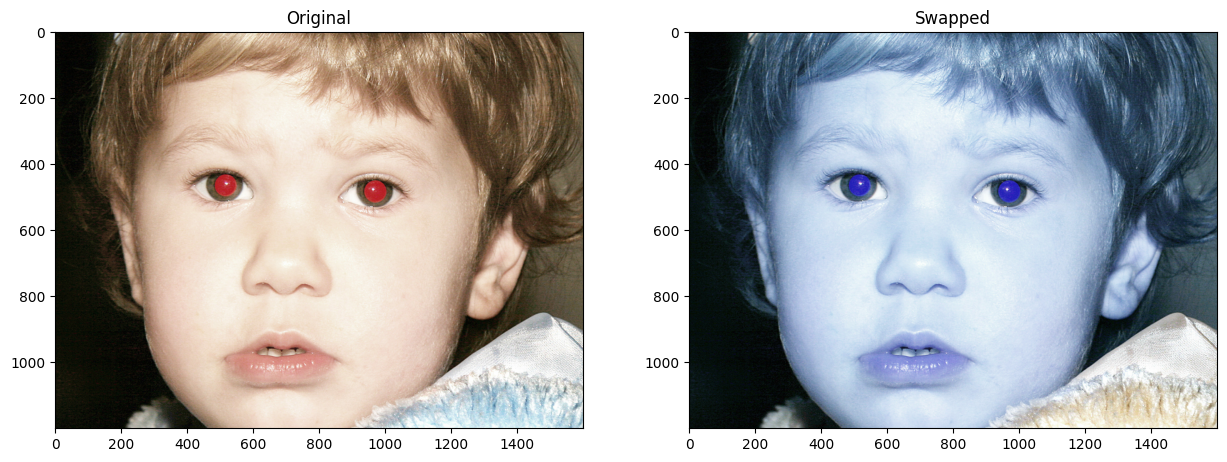

In [21]:
swap_kid = ChSwap(red_eye_kid)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(red_eye_kid)
ax[0].set_title("Original")

ax[1].imshow(swap_kid)
ax[1].set_title("Swapped")

plt.show()


---

### Question 3

1. We have discussed intensity transformation functions in detail in class and you have gained necessary implementation skills from Lab1. Now, let’s apply them to a real life challenge!
2. Although not very common among us Indians, red-eye effect is a common phenomenon in flash photography where pupils in the eyes appear red! Automatic Redeye Detection and Correction Algorithms are now very common in most cameras and cell phones!! (Due to the inherent complexity, we will not deal with automatic detection aspect now, but will only work on correction)
3. Come up with your own red-eye correction algorithm (RedEyeRemoval) using piece-wise intensity transformations! (Don’t worry if other parts of the image with red color get distorted!)
4. Two important aspect of this algorithm are
   1. Figuring out the range of intensities to modify
   2. Deciding on what the modified intensity values should be!
5. Four sample images with red eyes are provided with this lab. Your function, RedEyeRemoval, should take an input image and display/output the corrected image. Using `matplotlibplot`, display the original and new images side-by-side. (Test your algorithm on all the sample images.)


Loading the required images.

In [22]:
red_eye_effect = Image.open("./assets/Red-eye_effect.png")
red_eye_image = Image.open("./assets/redeye.jpg")
red_eye_baby = Image.open("./assets/redeyebaby.jpg")


Defining a function to plot all the images side-by-side.

In [23]:
def plot_all(func):
    fig, ax = plt.subplots(2, 4, figsize=(15, 10))
    
    ax[0, 0].imshow(red_eye_effect)
    
    ax[0, 1].imshow(red_eye_image)
    
    ax[0, 2].imshow(red_eye_baby)
    
    ax[0, 3].imshow(red_eye_kid)
    
    ax[1, 0].imshow(func(red_eye_effect))
    
    ax[1, 1].imshow(func(red_eye_image))
    
    ax[1, 2].imshow(func(red_eye_baby))
    
    ax[1, 3].imshow(func(red_eye_kid))
    
    plt.show()


Defining a custom function for red-eye removal.

In [24]:
def red_eye_removal(im):
    im = np.array(im)
    im = im.astype(np.float64)
    
    im[im > 200] = 255
    im[im <= 200] = 0
    
    im = im.astype(np.uint8)
    
    return Image.fromarray(im)


Driver code to call functions to remove red-eye and display the images.

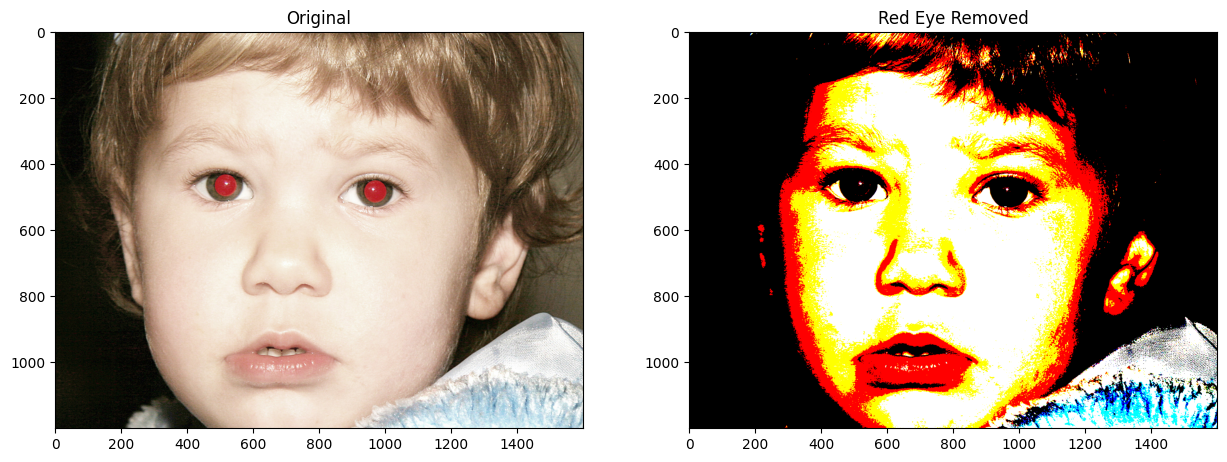

In [25]:
remove_kid = red_eye_removal(red_eye_kid)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(red_eye_kid)
ax[0].set_title("Original")

ax[1].imshow(remove_kid)
ax[1].set_title("Red Eye Removed")

plt.show()


Defining the second red-eye removal function and calling it.

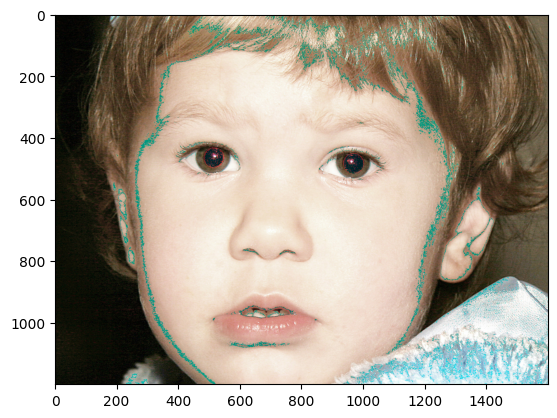

In [26]:
def red_eye_removal2(im):
    im = np.array(im)
    im = im.astype(np.float64)
    
    im[:, :, 0][(im[:, :, 0] > 180) & (im[:, :, 0] <= 190)] = 0
    
    im = im.astype(np.uint8)
    
    return Image.fromarray(im)

plt.imshow(red_eye_removal2(red_eye_kid))


Using the second red-eye removal function on all the specified images.

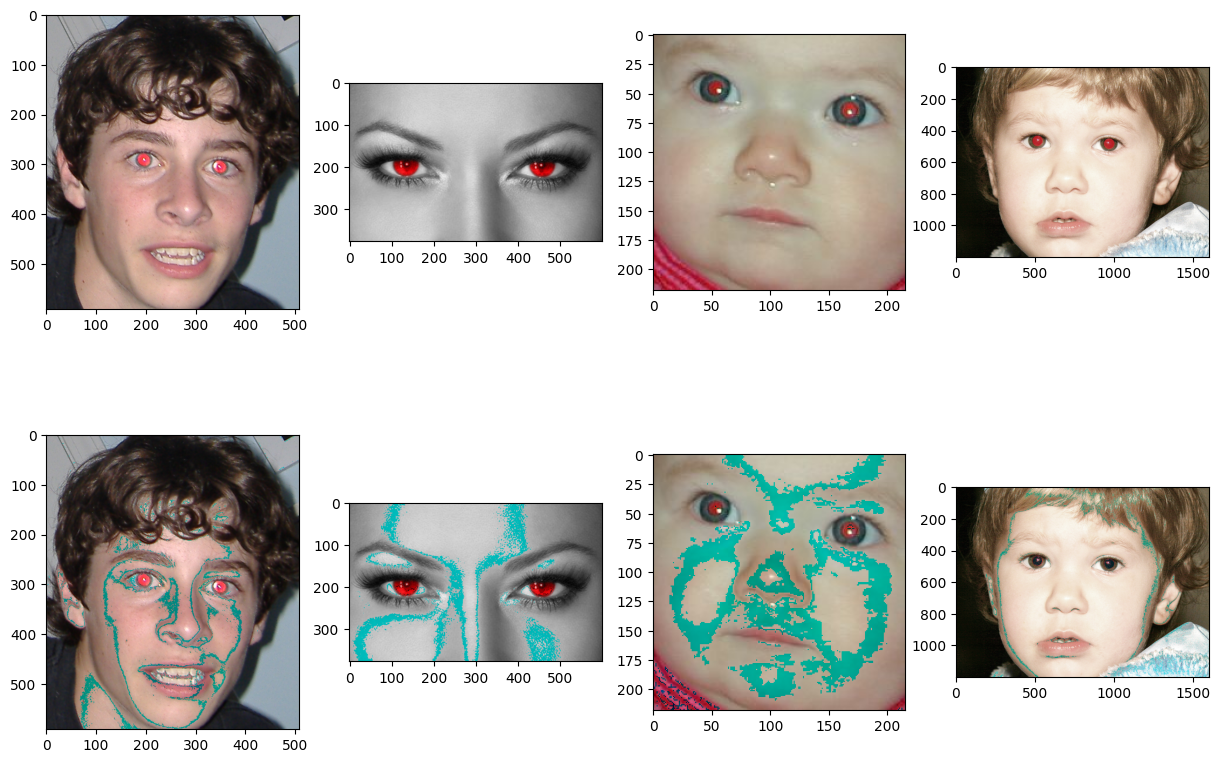

In [27]:
plot_all(red_eye_removal2)


Defining a third red-eye removal function and applying it to all images.

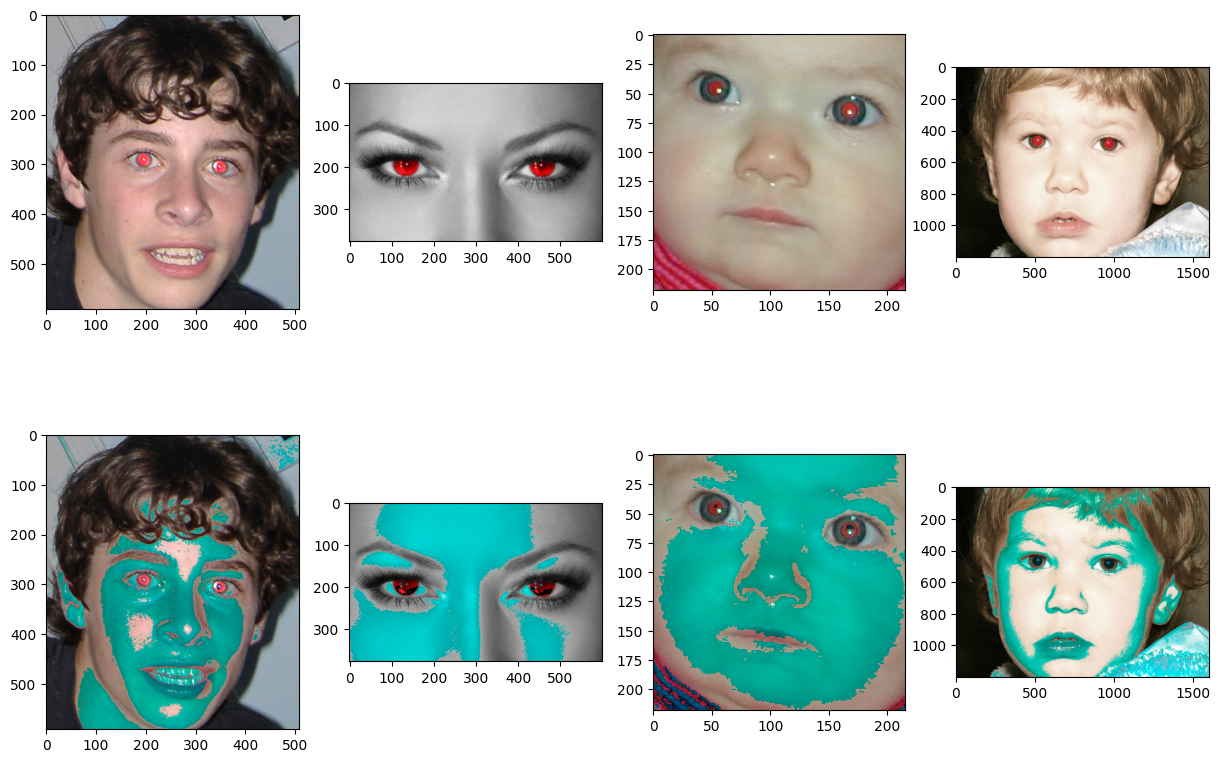

In [28]:
def red_eye_removal3(im):
    im = np.array(im)
    im = im.astype(np.float64)
    
    im[:, :, 0][(im[:, :, 0] > 170) & (im[:, :, 0] <= 230)] = 00
    
    im = im.astype(np.uint8)
    
    return Image.fromarray(im)


plot_all(red_eye_removal3)


Defining a fourth red-eye removal function and applying it to all images.

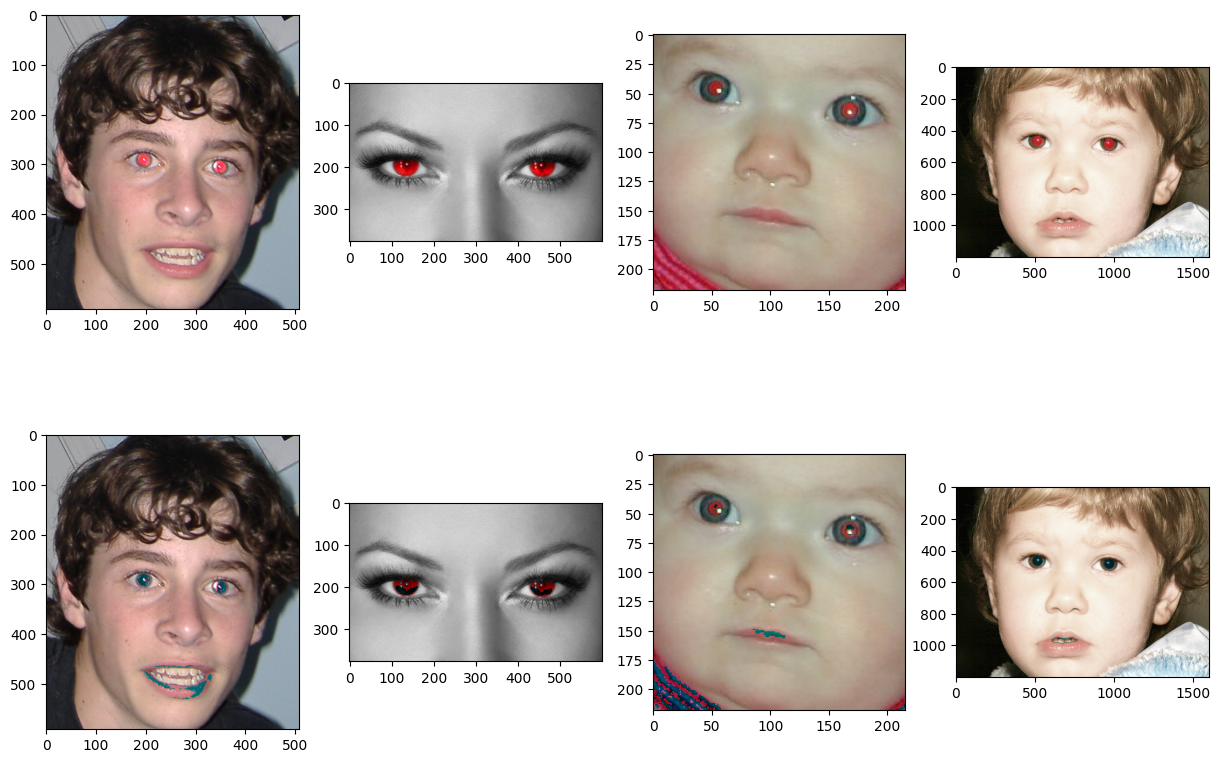

In [29]:
def red_eye_removal4(im):
    im = np.array(im)
    im = im.astype(np.float64)
    
    im[:, :, 0][(im[:, :, 0] > 170) & (im[:, :, 2] <= 120) & (im[:, :, 1] <= 120)] = 0
    
    im = im.astype(np.uint8)
    
    return Image.fromarray(im)


plot_all(red_eye_removal4)


Defining a fifth red-eye removal function and applying it to all images.

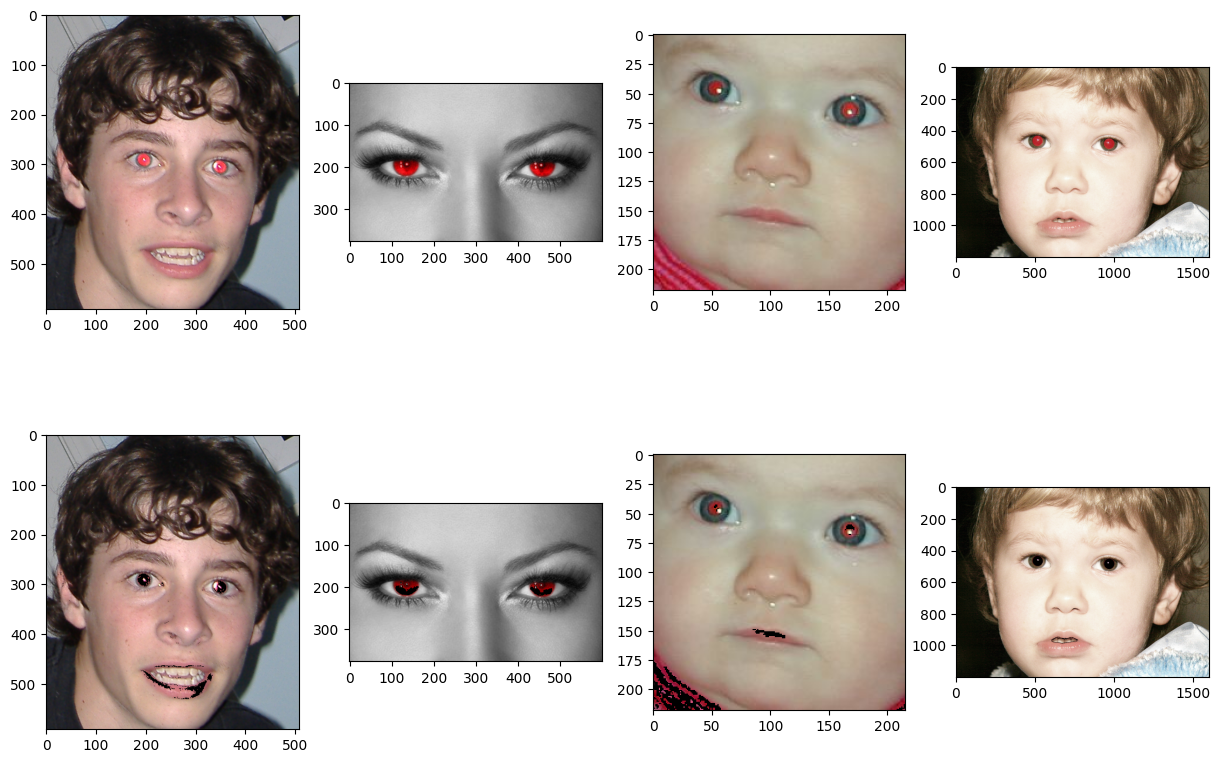

In [30]:
def red_eye_removal5(im):
    im = np.array(im)
    im = im.astype(np.float64)
    
    im[(im[:, :, 0] > 170) & (im[:, :, 2] <= 120) & (im[:, :, 1] <= 120)] = 0
    
    im = im.astype(np.uint8)
    
    return Image.fromarray(im)


plot_all(red_eye_removal5)


Defining a sixth and final red-eye removal function and applying it to all images.

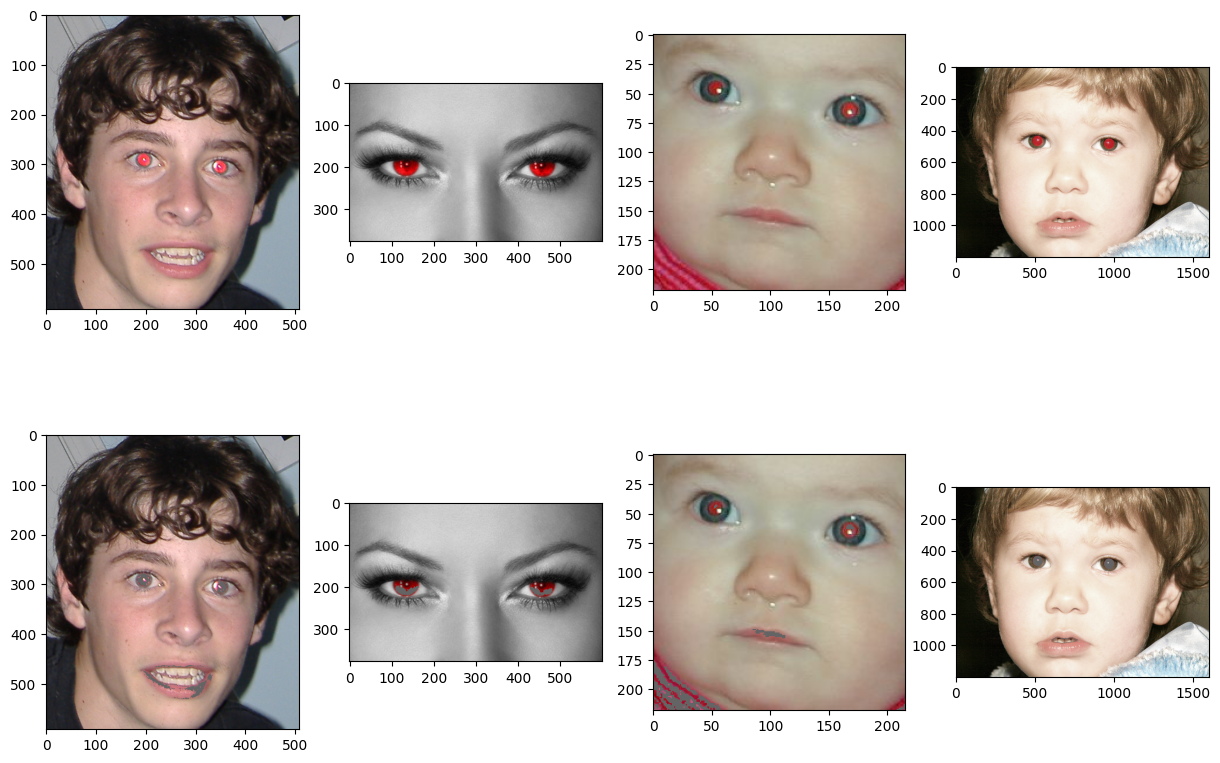

In [31]:
def red_eye_removal_final(im):
    im = np.array(im)
    im = im.astype(np.float64)
    
    im[(im[:, :, 0] > 170) & (im[:, :, 2] <= 120) & (im[:, :, 1] <= 120)] = 100
    
    im = im.astype(np.uint8)
    
    return Image.fromarray(im)


plot_all(red_eye_removal_final)
